In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [48]:
path = 'training_data/Digits'

In [49]:
#Get the data
classes = 10 
images = []
labels = [] 

In [52]:
for i in range(0, classes):
    imgList = os.listdir(path+'/'+str(i))
    for j in imgList:
        currentImg = cv2.imread(path+'/'+str(i)+'/'+str(j))
        currentImg = cv2.resize(currentImg, (28, 28))
        images.append(currentImg)
        labels.append(i)
       

In [53]:
 
print(len(images))
print(len(labels))

10160
10160


In [54]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(10160, 28, 28, 3)
(10160,)


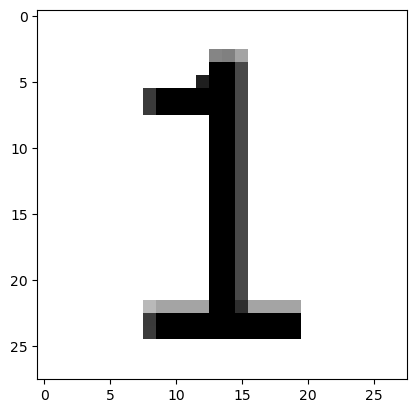

In [56]:
plt.imshow(images[2000])

In [57]:
#Split the data into Train, Test and Validation Sets

In [58]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2)
print(train_images.shape)
print(test_images.shape)

(8128, 28, 28, 3)
(2032, 28, 28, 3)


In [59]:
train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print(train_images.shape)
print(val_images.shape)

(6502, 28, 28, 3)
(1626, 28, 28, 3)


In [60]:
#Preprocessing the data

In [61]:
def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

In [62]:
train_images = np.array(list(map(preProcess, train_images)))
test_images = np.array(list(map(preProcess, test_images)))
val_images = np.array(list(map(preProcess, val_images)))
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(6502, 28, 28)
(2032, 28, 28)
(1626, 28, 28)


In [63]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(6502, 28, 28, 1)
(2032, 28, 28, 1)
(1626, 28, 28, 1)


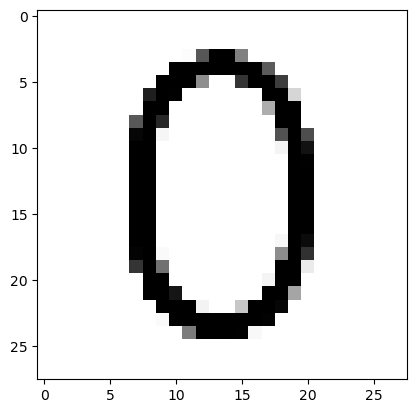

In [64]:
plt.imshow(images[200])

In [65]:
#Defining Callback

In [66]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

In [67]:
#Creating CNN Model

In [68]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [69]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 64)         

In [70]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [71]:
#Training the model

In [72]:
callbacks = myCallback()
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 30, validation_data = (val_images, val_labels), callbacks = [callbacks])

Epoch 1/30
204/204 [==============================] - 4s 16ms/step - loss: 2.0495 - accuracy: 0.2379 - val_loss: 0.6940 - val_accuracy: 0.8825
Epoch 2/30
204/204 [==============================] - 3s 15ms/step - loss: 0.9645 - accuracy: 0.6632 - val_loss: 0.1922 - val_accuracy: 0.9434
Epoch 3/30
204/204 [==============================] - 3s 16ms/step - loss: 0.5611 - accuracy: 0.8182 - val_loss: 0.1107 - val_accuracy: 0.9686
Epoch 4/30
204/204 [==============================] - 3s 16ms/step - loss: 0.4031 - accuracy: 0.8713 - val_loss: 0.0728 - val_accuracy: 0.9803
Epoch 5/30
204/204 [==============================] - 3s 16ms/step - loss: 0.3510 - accuracy: 0.8894 - val_loss: 0.0596 - val_accuracy: 0.9865
Epoch 6/30
204/204 [==============================] - 3s 16ms/step - loss: 0.2841 - accuracy: 0.9090 - val_loss: 0.0532 - val_accuracy: 0.9834
Epoch 7/30
204/204 [==============================] - 3s 17ms/step - loss: 0.2531 - accuracy: 0.9222 - val_loss: 0.0423 - val_accuracy: 0.9852

In [74]:
#Plotting Graphs

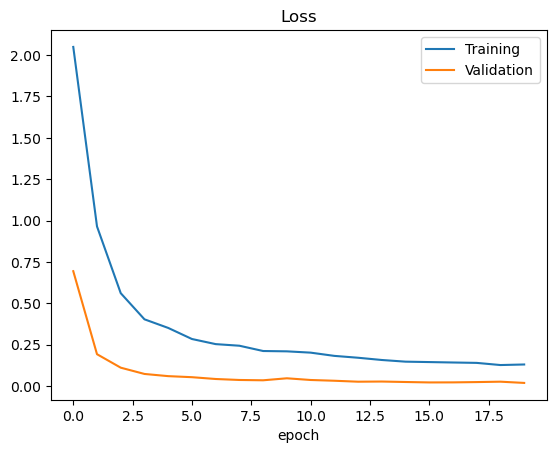

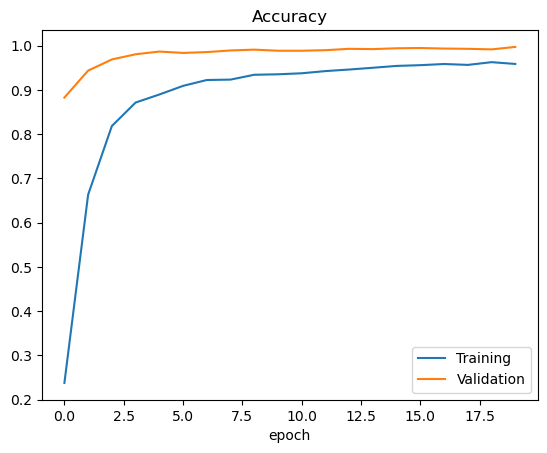

In [75]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [76]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test Score : ', score[0])
print('Test Accuracy : ', score[1])

64/64 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9936
Test Score :  0.02028033323585987
Test Accuracy :  0.9936023354530334


In [77]:
model.save('digit')
model.save("digit.h5")

INFO:tensorflow:Assets written to: digit\assets


INFO:tensorflow:Assets written to: digit\assets
